# CS4320 Introduction to Machine Learning

## A Template for the Course Project Submssion

Note: This template is optional. You can design your Jupyter Notebook structure based on your competition and preference. However, we expect you practice as many machine learning skills you learned in this course as possible.

**Please type your group name here:**

In [1]:
GroupName = "Jack Agren, Enoch Shumway, Matthew Backland"
assert GroupName != "", 'Please enter your name in the above quotation marks, thanks!'

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Submit the predictions to Kaggle](#13)
14. [Your takeaway from the course](#14)

## Introduction <a name="in"></a>

A few notes and tips when you work on this project: 

#### Tips
1. The project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 

### Link to Project
https://www.kaggle.com/competitions/playground-series-s3e4


## Motivation

This dataset provides a chance to solve a real world problem of detecting credit card fraud. The utility of producing a model for this is what drew us to work on this problem. If a model can reliably predict if a transaction is fraud, then a company can more easily block fraudulent transactions and alert customers that their information has been stolen. 

## The data

To protect the privacy of the customers, the features have been combined and obfuscated using a technique called principle component analasys. It uses some linear algebra to reduce the number of features. You can read more about this [here](https://en.wikipedia.org/wiki/Principal_component_analysis). This means that we don't know what most of the features represent, limiting our options for feature engineering.

## Amount and Time

These features are not rescaled, so we can interperate them. 

+ **Amount** is simply the amount of money in each transaction.
+ **Time** is the number of seconds since the first entry in the dataset. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve,precision_recall_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import AdaBoostClassifier, IsolationForest
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import optuna
from optuna.samplers import TPESampler
import lightgbm as lgb
from warnings import filterwarnings



/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
credit_card_df = pd.read_csv('data/train.csv')
credit_card_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

**Your tasks:**

1. Split the data into train and test portions.

In [4]:
credit_card_df = credit_card_df.drop_duplicates() # Just in case
train_df, test_df = train_test_split(credit_card_df, test_size=.2, random_state=10)
print('train shape: ' + str(train_df.shape))
print('test shape: ' + str(test_df.shape))

train shape: (175303, 32)
test shape: (43826, 32)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA

Let's see if we can learn anything about the features despite them being obfuscated.

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>],
       [<Axes: title={'center': 'V5'}>, <Axes: title={'center': 'V6'}>,
        <Axes: title={'center': 'V7'}>, <Axes: title={'center': 'V8'}>,
        <Axes: title={'center': 'V9'}>, <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>, <Axes: title={'center': 'V16'}>],
       [<Axes: title={'center': 'V17'}>, <Axes: title={'center': 'V18'}>,
        <Axes: title={'center': 'V19'}>, <Axes: title={'center': 'V20'}>,
        <Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>],
       [<Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>, <A

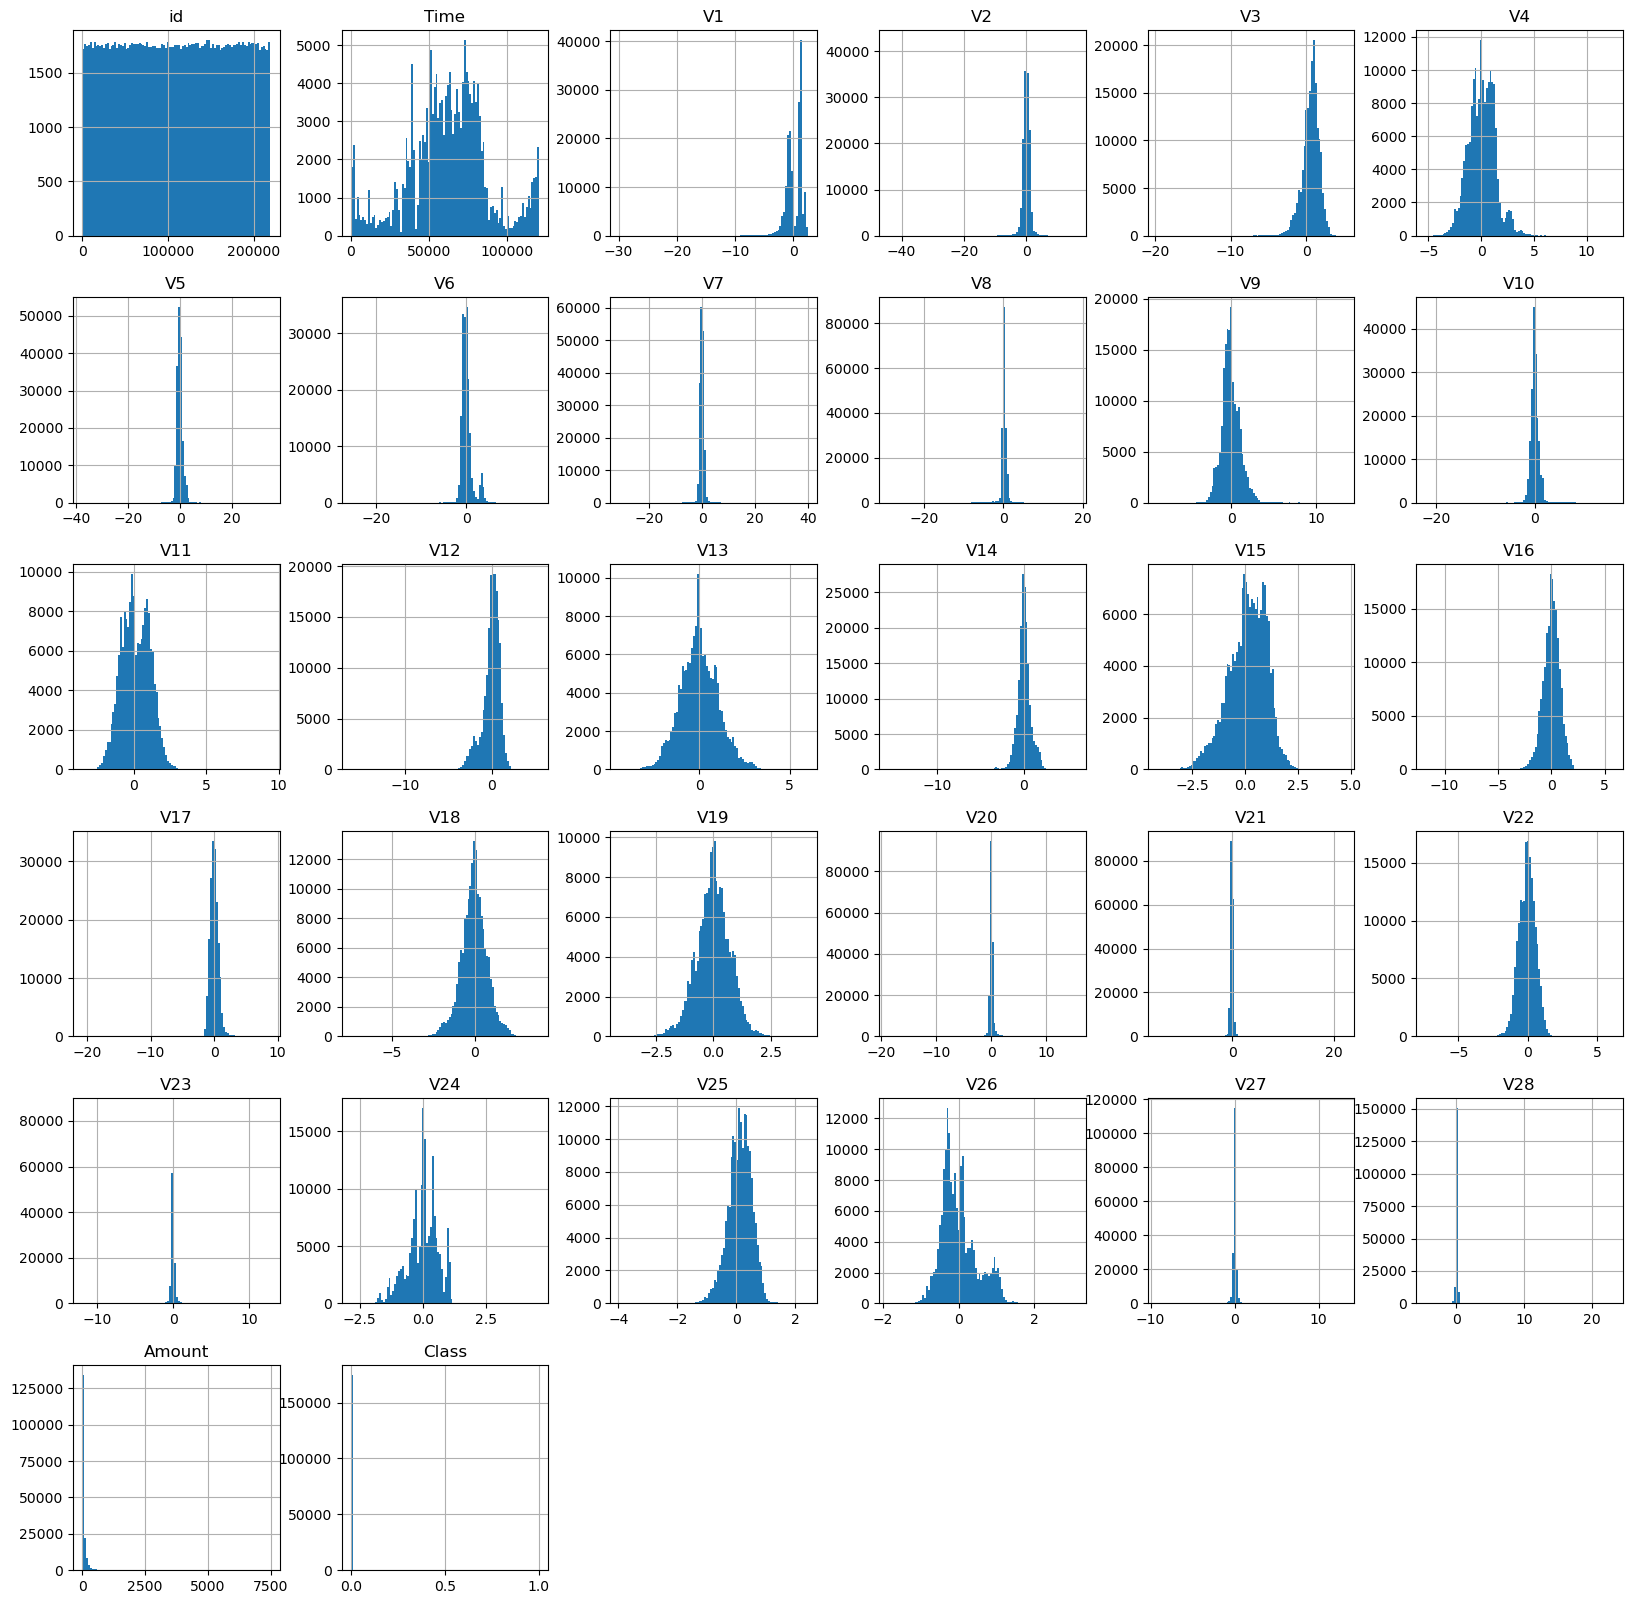

In [5]:
train_df.hist(figsize=(20, 20), bins=100)

Unfortunately, we can't learn much about the features from these histograms. They seem to have been standardized in some way. We can see that most transactions are small, but a few of them are very large. There are also more transactions at certain times of the day. We will need to scale these 2 features, but our options for using them for feature engineering are limited without knowledge of the other features.

We also can notice that 'Class', the target class, seems to be very imbalanced.

Text(0, 0.5, '')

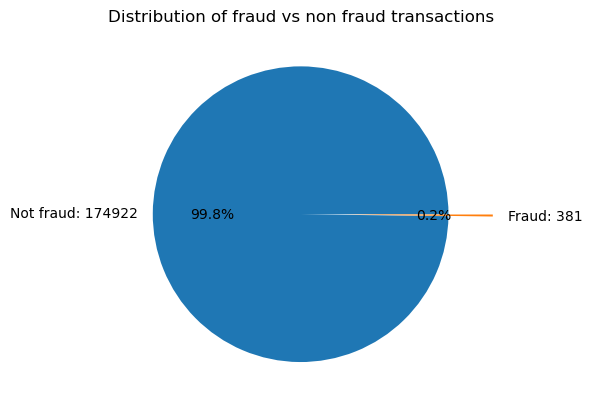

In [6]:
descriptive = train_df.describe()
counts = train_df['Class'].value_counts()
pie = counts.plot.pie(
                        explode=(0, .3), 
                        autopct='%1.1f%%', 
                        title="Distribution of fraud vs non fraud transactions", 
                        labels=(f'Not fraud: {counts[0]}', f'Fraud: {counts[1]}')
                    )
pie.set_ylabel("")



Since most transactions are not fraudulent, the target class has many more non fraud cases than fraud cases, as shown above. This will make training a model more difficult. 

Let's investigate the "Amount" feature. This feature is not transformed like most of the rest of them, and we can tell from the histogram that it has a very extreme range. 

In [7]:
desc = train_df.describe()
summary = desc['Amount'].iloc[[1, 3, 7]]
print(desc['Amount'])


count    175303.000000
mean         66.685398
std         152.833173
min           0.000000
25%           5.990000
50%          21.950000
75%          69.000000
max        7475.000000
Name: Amount, dtype: float64


There are 2 interesting things in these statistics. First, the mean is much larger than the median; in fact, it is nearly equal to the 75th percentile!

In [8]:
print('0 amount transactions:', train_df[(train_df['Amount']==0)].shape[0])
print('0 amount transactions that are fraud:', train_df[(train_df['Amount']==0) & train_df["Class"] == 1].shape[0])


0 amount transactions: 1479
0 amount transactions that are fraud: 10


Since there are so many transactions with 0 amount, including 10 that are classified as fraud, we didn't think it was a mistake with the data. Our theory is that these are cases where people used their credit card to sign up for something like a free trial, so it is counted as a 'transaction' even though no money changed hands. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set. You may have to go back and forth between feature engineering and preprocessing. Briefly explain why you come up with these new features.

**Time**: We decided to drop the time feature. Although time most likely plays a role in determining if a transaction is fraud, doing time-series analysis is beyond this class, and we think including it as a normal feature might obscure the effect of other features.

Unfortunately, we have limited options here. The features have been obscured and standardized, obscuring their true values.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

We decided to scale all of the features. 'Amount' needed scaling as it is not on the same scale as the other features. We decided to scale the anonymous features as well after noticing that they also seem to have very different ranges and distributions based on the histograms above.

In [9]:
X_train = train_df.drop(['Class'], axis=1)
y_train = train_df['Class']

X_test = test_df.drop(['Class'], axis=1)
y_test = test_df['Class']

numeric_standard_features = ['Amount','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
preprocessor = make_column_transformer((StandardScaler(), numeric_standard_features))


## A note about scoring

We are using the ROC score as the primary metric for our models. With data like this it is really difficult to definitively decide if a transaction is fraud. Ultimately, it is up to a company how much they care about precision vs recall on their model. Kaggle also grades our submissions based on the ROC score.

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [10]:
# Based on function written by Hikmatullah Mohammadi
# https://www.kaggle.com/code/hikmatullahmohammadi/simple-credit-card-fraud-detection-ps-s3e4

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def get_out_of_fold_models(estimator, num_folds, X, y, seed=None, shuffle=True):
    '''
    This function performs cross validation on the model, gets the ROC AUC score for each 
    validation, and plots the ROC curve. 

    Parmeters: 
    - estimator: implements fit and predict_proba
    - num_folds: Number of folds
    - X: X_train
    - y: y_train
    - seed=none | random seed
    - shuffle = True: shuffles data before each fold
    Returns a data frame with trained models and ROC AUC scores
    '''
    KFOLDS = num_folds
    skf = StratifiedKFold(n_splits=KFOLDS, shuffle=shuffle, random_state=seed)

    models = {
        'models': [],
        'roc_auc_scores': []
    }
    # iterate through folds. The index variables are arrays of indicies.
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        # train on the i-th fold
        estimator.fit(X.iloc[train_index], y.iloc[train_index])
        y_proba = estimator.predict_proba(X.iloc[test_index])[:, 1]
        # get the AUC score
        auc_score = roc_auc_score(y.iloc[test_index], y_proba)
        models['models'].append(estimator)
        models['roc_auc_scores'].append(auc_score)
        fpr, tpr, _ = roc_curve(y.iloc[test_index], y_proba)
        plt.plot(fpr, tpr, label=f'Fold-{i} (AUC = {auc_score:.2f})')
        print(f'Fold-{i} finished!')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Each Fold')
    plt.legend()
    plt.show()
    return pd.DataFrame(models)

/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

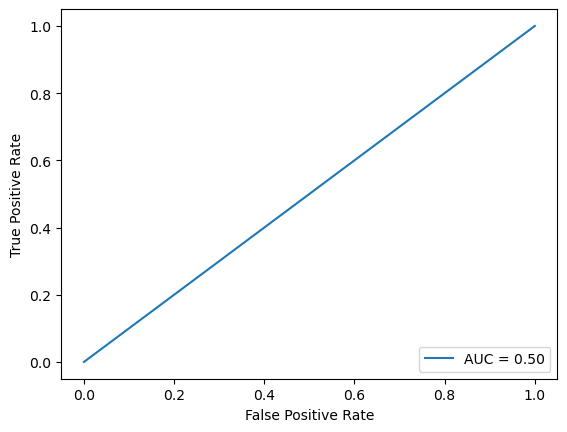

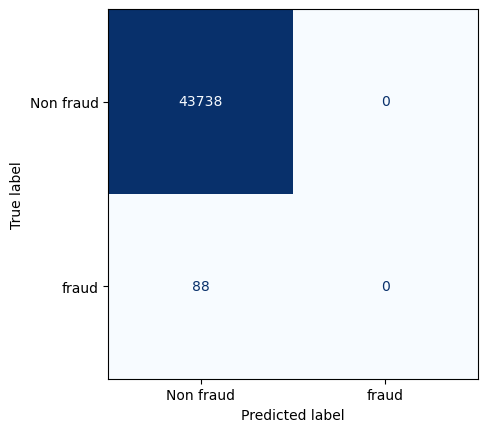

In [11]:
dummy_pipline = make_pipeline(
    preprocessor,
    DummyClassifier(strategy='most_frequent'),
)

dummy_model = dummy_pipline.fit(X_train, y_train)

dummy_prediction = dummy_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, dummy_prediction)
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc(fpr, tpr)).plot()

disp = ConfusionMatrixDisplay.from_estimator(
    dummy_model,
    X_test,
    y_test,
    display_labels=["Non fraud", "fraud"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

This function will evaluate our models using a special cross validation that keeps the proportion of fraud and not fraud the same in each fold. It will output a graph of all the roc curves along with an average ROC AUC score.

In [12]:
# LogisticRegression Model with Hyperparameter optimization

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

lr_pipeline = make_pipeline(
    preprocessor,
    SMOTEENN(random_state=10),
    LogisticRegression(class_weight='balanced')
)

lr_model = lr_pipeline.fit(X_train, y_train)


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Fold-0 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Fold-1 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Fold-2 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Fold-3 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Fold-4 finished!


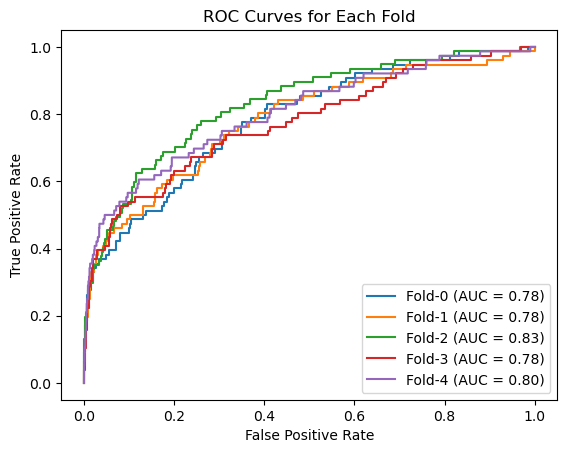

0.7956447068329099
Precision Recall Curve for model


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

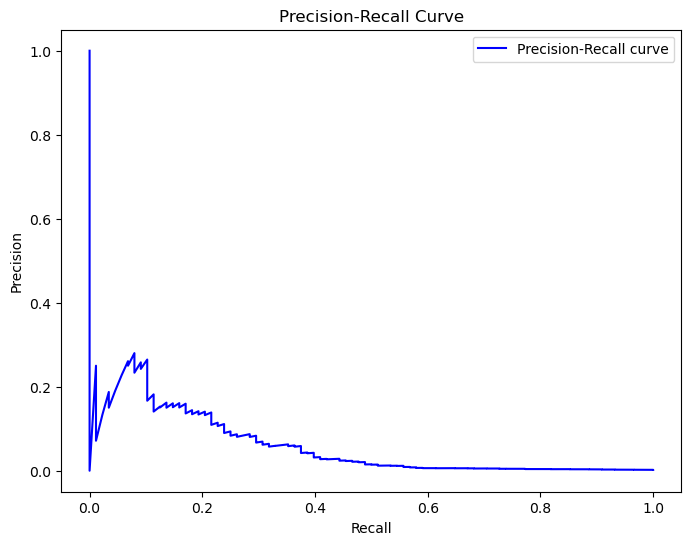

0.05553349647872995


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

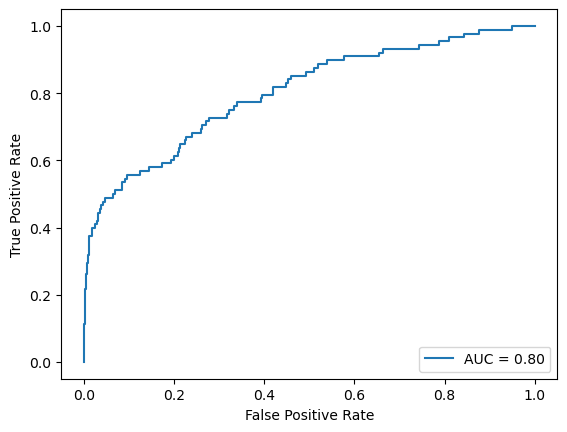

In [13]:
scores = get_out_of_fold_models(lr_pipeline, 5, X_train, y_train, seed=10)
print(scores['roc_auc_scores'].mean())
print('Precision Recall Curve for model')
lr_predict_proba = lr_model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, lr_predict_proba[:,1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

fpr, tpr, _ = roc_curve(y_test, lr_predict_proba[:,1])
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc_score(y_test, lr_predict_proba[:,1])).plot()

pr_auc = auc(recall, precision)
print(pr_auc)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>

**Your tasks:**
1. Try other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

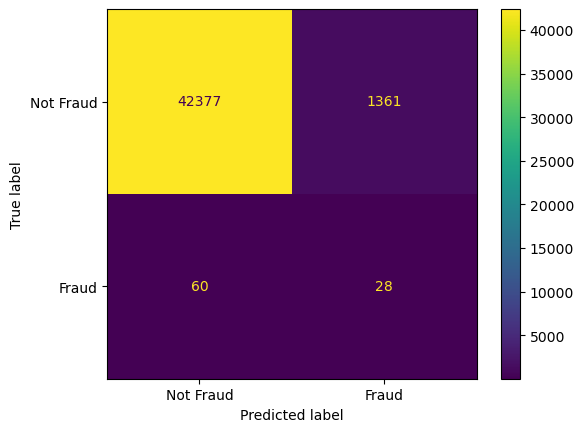

              precision    recall  f1-score   support

   not fraud       1.00      0.97      0.98     43738
       fraud       0.02      0.32      0.04        88

    accuracy                           0.97     43826
   macro avg       0.51      0.64      0.51     43826
weighted avg       1.00      0.97      0.98     43826



/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [14]:
# Isolation Forest

iso_pipe = make_pipeline(
    preprocessor, 
    IsolationForest(n_estimators=300)
)

iso_pipe.fit(X_train)
predictions = iso_pipe.predict(X_test)
predictions[predictions == 1] = 0
predictions[predictions == -1] = 1
cm = confusion_matrix(y_test, predictions)
plot = ConfusionMatrixDisplay(
    cm,
    display_labels=['Not Fraud', 'Fraud']
).plot()
plt.show()
print(classification_report(y_test, predictions, target_names=['not fraud', 'fraud']))

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>

**Your tasks:**

Make some attempts to select relevant features. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it. 

We elected to try skLearn's SelectFpr api for this. SelectFpr selects features based on their false positive rate. 

In [15]:
from sklearn.feature_selection import SelectFpr
print(X_train.shape)
X_new = SelectFpr(alpha=.01).fit_transform(X_train, y_train)
X_new.shape

/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

(175303, 31)


(175303, 23)

As was discussed earlier, we elected to drop time because it was measured in milliseconds since transactions began being tracked. This was not helpful to us, as it made it very difficult for the model to pull any data from that feature. All other features were obfuscated, so we elected to focus on finding models that could work with imbalanced datasets rather than trying to see what, if any, features were more important. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

We used a library called Optuna to utilize Bayesian optimization to optimize our hyperparameters.
This code is optimizing the hyperparameters for the LGBM model:

In [16]:
# Transforming and Oversampling Dataset

lgbm_train, lgbm_val = train_test_split(train_df, test_size=.2)
X_val, y_val = lgbm_val.drop(['Class'], axis=1), lgbm_val['Class']
X_train_lgbm, y_train_lgbm = lgbm_train.drop(['Class'], axis=1), lgbm_train['Class']

In [17]:
# Optuna function to find the best hyperparameters, Utilizes ROC AUC score to optimize

# The hyperparameter search is pretty complicated, but it performs better than a randomized search generally.
import lightgbm as lgb
def objectiveClassifier(trial):
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    
    lgb_pipe = make_pipeline(
        preprocessor, 
        SMOTEENN(random_state=10),
        lgb.LGBMClassifier(**param)
        )

    lgbm_model = lgb_pipe.fit(X_train_lgbm, y_train_lgbm)
    preds = lgbm_model.predict(X_val)
    roc = roc_auc_score(y_val, preds)
    return roc

In [18]:
import optuna
from optuna.samplers import TPESampler
sampler = TPESampler(seed=1)
study_classifier = optuna.create_study(study_name="lightgbm", direction="maximize", sampler=sampler)
study_classifier.optimize(objectiveClassifier, n_trials=1)

[I 2023-12-05 22:25:06,744] A new study created in memory with name: lightgbm
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearnin

[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

In [19]:
print('Best parameters:', study_classifier.best_params)

Best parameters: {'lambda_l1': 5.6649755830282306e-05, 'lambda_l2': 0.030403280126677572, 'num_leaves': 2, 'feature_fraction': 0.5813995435791038, 'bagging_fraction': 0.48805353449026784, 'bagging_freq': 1, 'min_child_samples': 22}


In [20]:

# Inserting best params into a LGBMClassifier

# Oversampling with ROC AUC Score
final_classifier = lgb.LGBMClassifier(
    **study_classifier.best_params
)

# Fit model and make predictions on TEST SET
final_classifier.fit(X_train_lgbm, y_train_lgbm)

/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05


LGBMClassifier(bagging_fraction=0.48805353449026784, bagging_freq=1,
               feature_fraction=0.5813995435791038,
               lambda_l1=5.6649755830282306e-05, lambda_l2=0.030403280126677572,
               min_child_samples=22, num_leaves=2)

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

def get_out_of_fold_models(estimator, num_folds, X, y, seed=None, shuffle=True):
    '''
    This function returns a DataFrame with two columns:
        - models which is models trained on each fold and
        - roc_auc_score which is the score of the corresponding model
    '''
    KFOLDS = num_folds
    skf = StratifiedKFold(n_splits=KFOLDS, shuffle=shuffle, random_state=seed)

    models = {
        'models': [],
        'roc_auc_scores': [],
    }
    # iterate through folds. The index variables are arrays of indicies.
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        # train on the i-th fold
        estimator.fit(X.iloc[train_index], y.iloc[train_index])
        y_proba = estimator.predict_proba(X.iloc[test_index])[:, 1]
        # get the AUC score
        auc_score = roc_auc_score(y.iloc[test_index], y_proba)
        models['models'].append(estimator)
        models['roc_auc_scores'].append(auc_score)
        fpr, tpr, _ = roc_curve(y.iloc[test_index], y_proba)
        plt.plot(fpr, tpr, label=f'Fold-{i} (AUC = {auc_score:.2f})')
        print(f'Fold-{i} finished!')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Each Fold')
    plt.legend()
    plt.show()
    return pd.DataFrame(models)

/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Fold-0 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Fold-1 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Fold-2 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Fold-3 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Fold-4 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Fold-5 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Fold-6 finished!


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

[LightGBM] [Warning] bagging_fraction is set=0.48805353449026784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48805353449026784
[LightGBM] [Warning] feature_fraction is set=0.5813995435791038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5813995435791038
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.030403280126677572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.030403280126677572
[LightGBM] [Warning] lambda_l1 is set=5.6649755830282306e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.6649755830282306e-05


/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

Fold-7 finished!


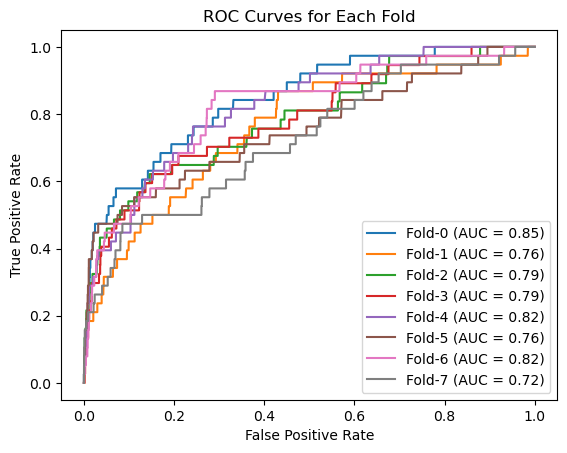

Mean cv auc score:  0.787112440395922


In [22]:
lgb_pipe = make_pipeline(
        preprocessor, 
        SMOTEENN(random_state=10),
        final_classifier
        )

auc_scores = get_out_of_fold_models(lgb_pipe, 8, X_train_lgbm, y_train_lgbm, seed=10)
print('Mean cv auc score: ', auc_scores['roc_auc_scores'].mean())

/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

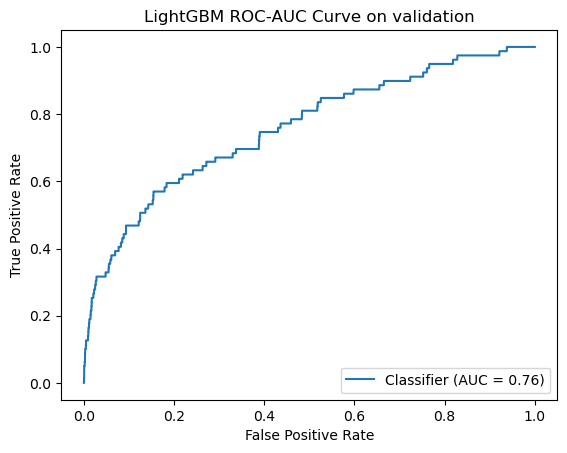

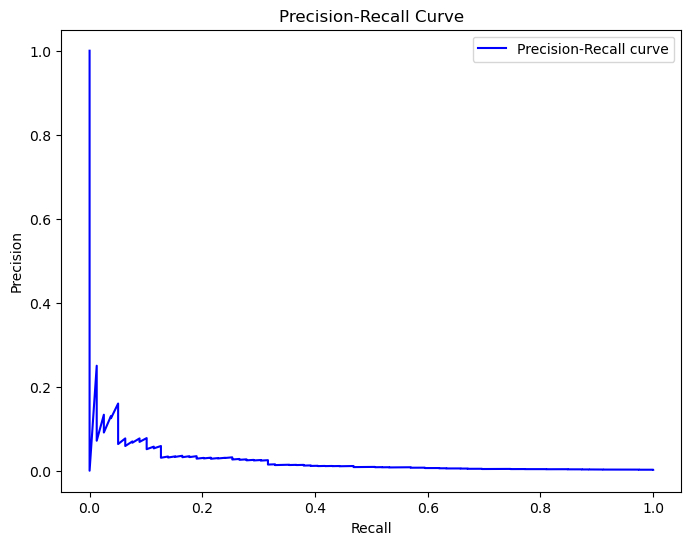

0.021150719503032087

In [23]:
# Make ROC AUC graph
preds = final_classifier.predict_proba(preprocessor.fit_transform(X_val))
RocCurveDisplay.from_predictions(y_val.tolist(), preds[:, 1])
plt.title('LightGBM ROC-AUC Curve on validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Make precision recall graph

precision, recall, thresholds = precision_recall_curve(y_val, preds[:,1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

auc(recall, precision)

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Results on the test set <a name="12"></a>
<hr>

**Your tasks:**

1. Try your best performing model on the test data (from train test split) and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/enoch/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

Text(0, 0.5, 'True Positive Rate')

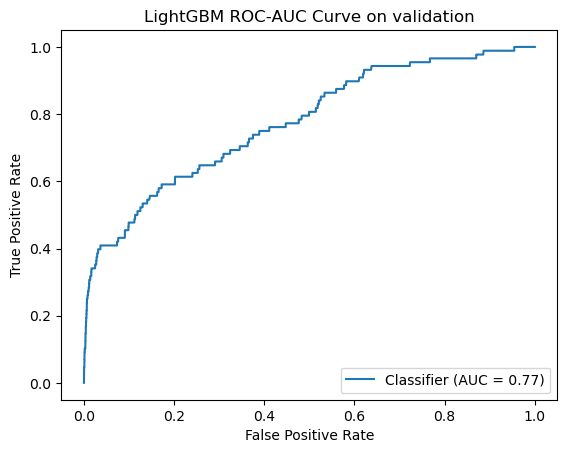

In [24]:
preds = final_classifier.predict_proba(preprocessor.fit_transform(X_test))
RocCurveDisplay.from_predictions(y_test.tolist(), preds[:, 1])
plt.title('LightGBM ROC-AUC Curve on validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Here are the best scores for each model we tested:

| Model               | Score                                 |
|---------------------|---------------------------------------|
| Dummy Classifier    | ROC: 0.5                              |
| K-nn                | ROC: 0.5                              |
| Logistic Regression | ROC: 0.56                             |
| Decision Tree       | ROC: 0.54                             |
| Isolation Forest    | Precision: 0.02 Recall: 0.38 F1: 0.04 |
| LGBM Classifier     | ROC: 0.76                             |
| Adaboost            | ROC: 0.75                             |

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Submit the predictions to Kaggle <a name="13"></a>
<hr>

**Your tasks:**

Retrain the best model on the whole training dataset and upload the predicted output on the test set to Kaggle. Report your final test score.

Our kaggle project stopped accepting submissions part way through the semester, so we do not have any results to display here. We were forced to use a Train, Validation, Test split and use the ROC AUC scores of our models on the test set. ROC AUC is the metric our kaggle competition was using.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Your takeaway <a name="14"></a>
<hr>



## Matthew's Takeaway

My main takeaway from this project was the importance of feature engineering in largescale machine learning projects. Once we identified a couple models that worked with the imbalanced data, we were unable to do much optimization because of the obfuscation of the dataset. We discovered this was largely the same for others who participated in the kaggle competition. Most variance in scores for the competition came from using different models with different hyperparameter optimizations. I believe we could have achieved a much higher score if we had been able to do more feature engineering and feature selection.

## Jack's Takeaway:

My biggest takeaway from this project was the importance of understanding your data. At first, we were just throwing models at the wall hoping something would stick. It wasn't until we stepped back and did some research that we began to make actual progress. I also learned that, while understanding a model/library is good and important, you don't need to be an expert in order to use the tools provided.

## Enoch's Takeaway: 

One big takeaway for me is that high quality data is very important. You can have the best models with large amounts of data, but if your data quality is not good, or your data does not actually have a relationship with your target, that you will ultimatly get nowhere. Another big takeaway is that you need to understand your data. You cannot throw your data into models at random and see any results, because even if you have the right model, it will take work to optimize that model and have it produce any good results. You might then assume that your data is no good. You have to first understand the nature of your data, and then select an appropriate model and optimize it in whatever way.